In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from itertools import product
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from itertools import product
import pandas as pd
import numpy as np
import warnings
import seaborn as sns


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Disable all warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data from Part 2
X_train = pd.read_csv('../data/training/X_train_v2_ohe.csv')
y_train = pd.read_csv('../data/training/y_train_v2_ohe.csv')
X_test = pd.read_csv('../data/testing/X_test_v2_ohe.csv')
y_test = pd.read_csv('../data/testing/y_test_v2_ohe.csv')
df_final = pd.read_csv('../data/processed/df_final_processed_no_bins.csv')
df_final_ohe = pd.read_csv('../data/processed/df_final_processed_OHE.csv')

In [3]:
df_final_ohe

,year_built,sqft,baths,stories,beds,garage,is_foreclosure,price,basement,central_air,...,city_Salem,city_Sandy Springs,city_Shoreview,city_Springfield,city_Tallahassee,city_Tolleson,city_Trenton,city_Tumwater,city_Verona,city_Yukon
0,1990,1500,2.0,1.0,3.0,2.0,0,200000,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2000,2000,3.0,2.0,3.0,2.0,0,200000,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2000,2000,2.0,2.0,3.0,2.0,0,200000,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1980,500,2.0,2.0,2.0,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2000,3000,3.0,2.0,4.0,2.0,0,200000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833,1980,1000,3.0,2.0,3.0,2.0,0,200000,1,1,...,0,0,0,0,0,0,0,0,0,0
4834,1980,4500,4.0,4.0,4.0,2.0,0,600000,1,1,...,0,0,0,0,0,0,0,0,0,0
4835,1990,2000,3.0,2.0,3.0,2.0,0,400000,1,1,...,0,0,0,0,0,0,0,0,0,0
4836,1890,2500,3.0,3.0,3.0,0.0,0,200000,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# One hot encoding without creating additional columns

# Encode the city column into unique numerical values
df_final['city_encoded'] = df_final['city'].astype('category').cat.codes
df_final['type_encoded'] = df_final['type'].astype('category').cat.codes
# Drop the original city column if not needed

df_final_part3 = df_final.drop(columns=['city', 'type'])

In [5]:
df_final_part3

,year_built,sqft,baths,stories,beds,garage,is_foreclosure,price,basement,central_air,...,hardwood_floors,laundry_room,recreation_facilities,shopping,single_story,two_or_more_stories,view,washer_dryer,city_encoded,type_encoded
0,1990,1500,2.0,1.0,3.0,2.0,False,200000,0,1,...,0,0,1,0,1,0,1,0,28,4
1,2000,2000,3.0,2.0,3.0,2.0,False,200000,0,1,...,0,0,0,0,0,1,0,0,28,4
2,2000,2000,2.0,2.0,3.0,2.0,False,200000,0,1,...,1,0,0,0,0,1,1,0,28,4
3,1980,500,2.0,2.0,2.0,1.0,False,0,0,1,...,0,0,1,1,0,1,1,0,28,1
4,2000,3000,3.0,2.0,4.0,2.0,False,200000,0,0,...,0,0,1,1,0,1,1,0,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833,1980,1000,3.0,2.0,3.0,2.0,False,200000,1,1,...,0,0,0,0,0,1,0,0,24,4
4834,1980,4500,4.0,4.0,4.0,2.0,False,600000,1,1,...,1,0,0,0,0,1,0,0,24,4
4835,1990,2000,3.0,2.0,3.0,2.0,False,400000,1,1,...,0,0,0,0,0,1,0,1,24,4
4836,1890,2500,3.0,3.0,3.0,0.0,False,200000,1,1,...,0,0,0,0,0,1,1,0,24,5


In [9]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
import joblib

# Define custom cross-validation function


def custom_cross_validation(training_data, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    training_folds = []
    validation_folds = []

    for train_index, val_index in kf.split(training_data):
        train_fold = training_data.iloc[train_index].copy()
        val_fold = training_data.iloc[val_index].copy()

        # Compute city means on the training folds
        city_means = train_fold.groupby(
            'city_encoded')['price'].mean().rename('city_mean_price')

        # Join these values to the validation fold
        val_fold = val_fold.join(city_means, on='city_encoded')

        # Fill NaN values that might appear due to missing cities in validation fold
        val_fold['city_mean_price'] = val_fold['city_mean_price'].fillna(
            train_fold['price'].mean())

        training_folds.append(train_fold)
        validation_folds.append(val_fold)

    return training_folds, validation_folds

# Define hyperparameter search function


def hyperparameter_search(training_folds, validation_folds, param_grid):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import ParameterGrid

    best_params = None
    best_score = float('inf')

    for params in ParameterGrid(param_grid):
        mse_scores = []

        for train_fold, val_fold in zip(training_folds, validation_folds):
            model = DecisionTreeRegressor(**params)
            X_train = train_fold.drop(columns=['price'])
            y_train = train_fold['price']
            X_val = val_fold.drop(columns=['price'])
            y_val = val_fold['price']

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            mse = mean_squared_error(y_val, y_pred)
            mse_scores.append(mse)

        avg_score = np.mean(mse_scores)

        if avg_score < best_score:
            best_score = avg_score
            best_params = params

    return best_params, best_score


# Define training data and target variable
X = df_final_part3.drop(columns=['price'])
y = df_final_part3['price']

# Combine X and y into a single dataframe for cross-validation
training_data = pd.concat([X, y], axis=1)

# Perform custom cross-validation
training_folds, validation_folds = custom_cross_validation(
    training_data, n_splits=5)

# Define the hyperparameter grid for the Decision Tree model
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter search
best_params, best_score = hyperparameter_search(
    training_folds, validation_folds, param_grid)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the final model using the best hyperparameters
final_model = DecisionTreeRegressor(**best_params, random_state=42)
X_train = training_data.drop(columns=['price'])
y_train = training_data['price']
final_model.fit(X_train, y_train)

# Save the final model
joblib.dump(final_model, 'final_decision_tree_model.pkl')
print("Model saved to final_decision_tree_model.pkl")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- city_mean_price


In [31]:

# X = df_final.drop('price', axis=1)
# y = df_final['price']

# # Define the parameter grid for Decision Tree
# param_grid = {
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }



In [7]:
# # Fit the model with the best parameters on the full training data
# best_model = DecisionTreeRegressor(
#     max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
# best_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = best_model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f"Decision Tree - MSE: {mse}, MAE: {mae}, R^2: {r2}")

# # Save the model
# model_filename = '../models/best-model/decision_tree_model.pkl'
# joblib.dump(best_model, model_filename)
# print(f"Model saved to {model_filename}")



Decision Tree - MSE: 413223140.4958678, MAE: 2066.115702479339, R^2: 0.9987508001073693
Model saved to ../models/best-model/decision_tree_model.pkl


In [8]:
# # Load the model from saved 
# loaded_model = joblib.load('../models/best-model/decision_tree_model.pkl')

# # Example usage with the loaded model
# sample_data = X_test.iloc[0:1]  # Take a sample from the test set
# predicted_price = loaded_model.predict(sample_data)
# print(f"Predicted price for sample data: {predicted_price[0]}")



Predicted price for sample data: 400000.0


In [9]:
#view sample data
sample_data

,year_built,sqft,baths,stories,beds,garage,is_foreclosure,basement,central_air,central_heat,...,city_Salem,city_Sandy Springs,city_Shoreview,city_Springfield,city_Tallahassee,city_Tolleson,city_Trenton,city_Tumwater,city_Verona,city_Yukon
0,1900,1500,3.0,2.0,3.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#verify predicted price is correct
y_test[0:1]

,price
0,400000


### Pipeline

In [11]:
# Ensure all categorical features are encoded
categorical_features = ['type', 'city']
numerical_features = [
    'year_built', 'sqft', 'baths', 'stories', 'beds', 'garage',
    'is_foreclosure', 'garage_1_or_more', 'garage_2_or_more',
    'hardwood_floors', 'laundry_room', 'recreation_facilities',
    'shopping', 'single_story', 'two_or_more_stories'
]

# Load the model from saved
loaded_model = joblib.load('../models/best-model/decision_tree_model.pkl')

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', loaded_model)#DecisionTreeRegressor(random_state=42))
])

# Split the data into training and test sets
X = df_final.drop('price', axis=1)
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Decision Tree - MSE: {mse}, MAE: {mae}, R^2: {r2}")

# Save the pipeline
model_filename = '../models/pipeline/decision_tree_pipeline.pkl'
joblib.dump(pipeline, model_filename)
print(f"Pipeline saved to {model_filename}")


Decision Tree - MSE: 826446280.9917356, MAE: 2892.561983471074, R^2: 0.9975016002147385
Pipeline saved to ../models/pipeline/decision_tree_pipeline.pkl


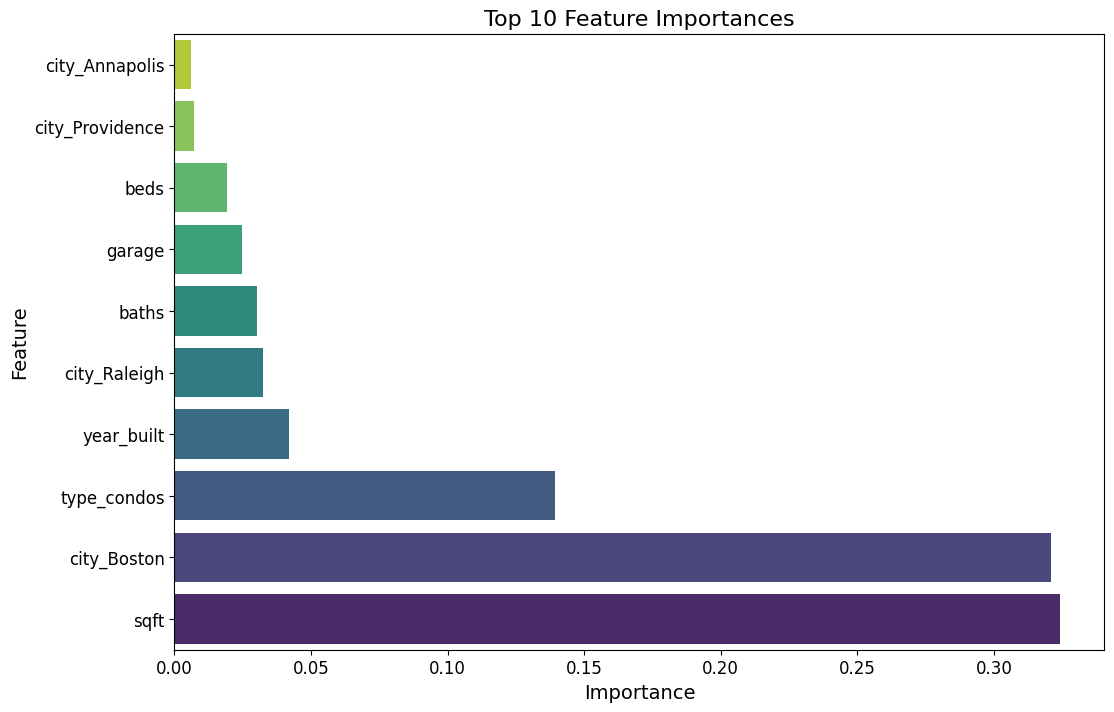

In [12]:
# Load the pipeline model from the file
pipeline = joblib.load('../models/pipeline/decision_tree_pipeline.pkl')

# Extract the feature importances from the model
loaded_model = pipeline.named_steps['model']
feature_importances = loaded_model.feature_importances_

# Extract numerical and categorical feature names from the preprocessor
preprocessor = pipeline.named_steps['preprocessor']
numerical_feature_names = numerical_features
categorical_transformer = preprocessor.named_transformers_['cat']
categorical_feature_names = categorical_transformer.get_feature_names_out(
    categorical_features)

# Combine all feature names
all_feature_names = np.concatenate(
    [numerical_feature_names, categorical_feature_names])

# Create a DataFrame for feature importances
importance_df = pd.DataFrame(
    {'Feature': all_feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance and select the top 10 features
importance_df = importance_df.sort_values(
    by='Importance', ascending=False).head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Top 10 Feature Importances', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.show()

In [13]:
all_feature_names

array(['year_built', 'sqft', 'baths', 'stories', 'beds', 'garage',
       'is_foreclosure', 'garage_1_or_more', 'garage_2_or_more',
       'hardwood_floors', 'laundry_room', 'recreation_facilities',
       'shopping', 'single_story', 'two_or_more_stories', 'type_condos',
       'type_mobile', 'type_multi_family', 'type_single_family',
       'type_townhomes', 'city_Ampthill', 'city_Annapolis',
       'city_Antelope', 'city_Antioch', 'city_Arden Hills',
       'city_Atlanta', 'city_Boston', 'city_Carson City',
       'city_Cave Creek', 'city_Charleston', 'city_Columbia',
       'city_Columbus', 'city_Denver', 'city_Des Moines', 'city_Dover',
       'city_Dublin', 'city_Edmond', 'city_Frankfort', 'city_Galloway',
       'city_Glendale', 'city_Grove City', 'city_Hamilton',
       'city_Hapeville', 'city_Harrisburg', 'city_Hartford',
       'city_Henrico', 'city_Highland Springs', 'city_Indianapolis',
       'city_Lansing', 'city_Lawrence', 'city_Lawrenceville',
       'city_Lincoln', 'cit

In [14]:
# Load the pipeline
loaded_pipeline = joblib.load('../models/pipeline/decision_tree_pipeline.pkl')

# Example usage with the loaded pipeline
sample_data = X_test.iloc[0:1]  # Take a sample from the test set
predicted_price = loaded_pipeline.predict(sample_data)
print(f"Predicted price for sample data: {predicted_price[0]}")

Predicted price for sample data: 400000.0


In [15]:
#validation
sample_data

,year_built,sqft,baths,stories,beds,garage,type,is_foreclosure,city,basement,...,garage_1_or_more,garage_2_or_more,hardwood_floors,laundry_room,recreation_facilities,shopping,single_story,two_or_more_stories,view,washer_dryer
3197,1900,1500,3.0,2.0,3.0,0.0,single_family,False,Richmond,0,...,0,0,1,1,0,0,0,1,0,0


In [16]:
y_test[0:1]

3197    400000
Name: price, dtype: int64